In [1]:
import pandas as pd
import sqlite3

- make a connection to the database (it is the same as the previous day)
- run a query that gets the datetime from the pageviews table, selecting only the
users and not the admins
- using Pandas, create a new dataframe where the visits are counted and grouped by
date
- using Pandas method .plot(), create a graph
    - the size of the font should be 8
    - the size of the figure is (15,8)
    - the graph must have the title Views per day
    - notice the rotation of xticks on the graph below

- close the connection to the database

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [3]:
query = "SELECT datetime FROM pageviews WHERE uid LIKE 'user_%';"
pageviews = pd.io.sql.read_sql(query, conn)
pageviews

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


In [4]:
pageviews['datetime'] = pd.to_datetime(pageviews['datetime'])
pageviews['date'] = pageviews['datetime'].dt.date
visits_per_day = pageviews.groupby('date').size().reset_index(name='visits')

<Axes: xlabel='date'>

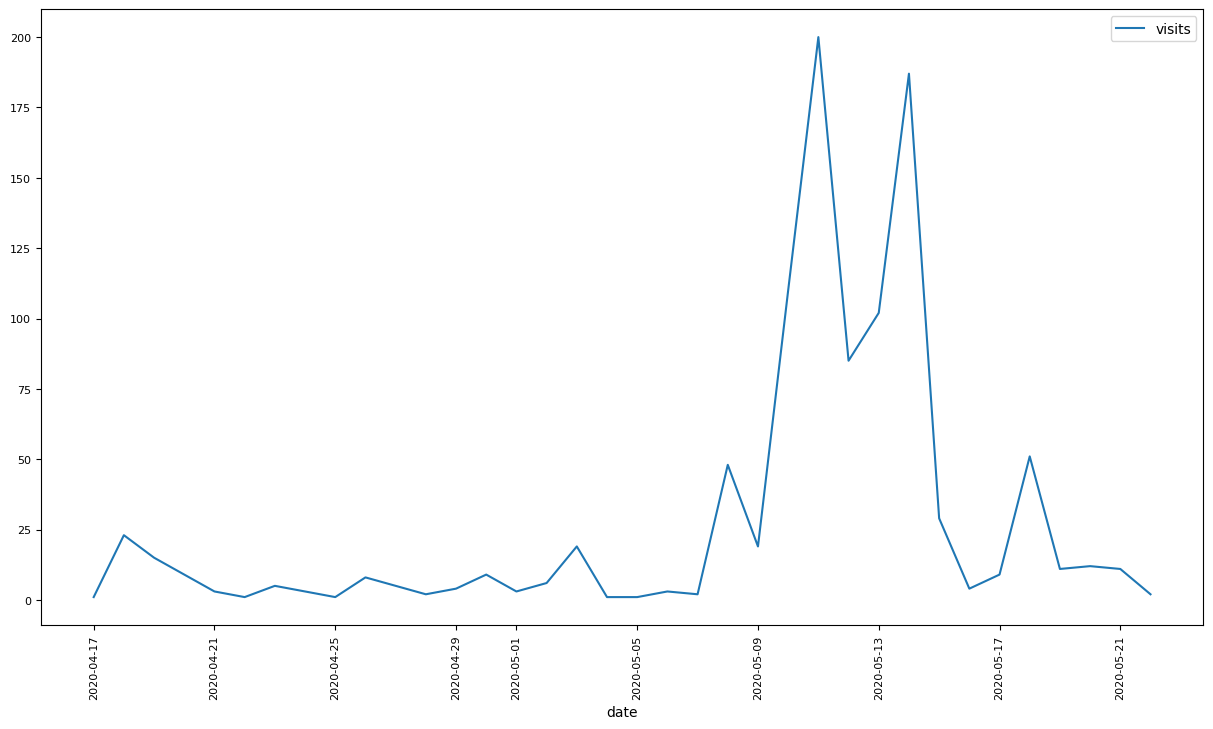

In [12]:
visits_per_day.plot(x='date', y='visits', kind='line', figsize=(15, 8), fontsize=8, rot=90)

In [ ]:
conn.close()